# CC3001 Otoño 2023 Tarea - Luciano Márquez

# Calculadora

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Enunciado

Esta tarea consiste en desarrollar una calculadora de expresiones matemáticas al estilo Matlab o Maple, pero con capacidad de procesar un conjunto de comandos bien restringido. Algunos ejemplos de los comandos que acepta y de lo que debe imprimir en la salida van a continuación:

|Entrada (lo que el usuario escribe)   | Salida(lo que imprime el programa)  |
|---|---|
|n=5   | 5  |
|hanoi=2^n-1    |31   |
|var_1 = 23 - 13 + hanoi * 2    |82   |
|h2 = hanoi /2   |15   |
|n   |5   |

A continuación definimos más en detalle lo que se debe implementar:



1.   Cada comando es de la forma "variable=expresión". El efecto es que se debe calcular la expresión de la derecha, guardar el resultado en la variable de la izquierda e imprimir el resultado en la salida. Si se omite desde el "=" hacia adelante (como en el último ejemplo), solo se imprime el valor de la variable. Las variables comienzan con letra y continúan con letras, dígitos y el signo "_".
2.   Los operadores permitidos son "+","-","*", "/", "^".
3.   Solo se trabaja con números enteros y todas las operaciones dan resultado entero (incluyendo la división, que trunca).
4.   Para simplificar, no se puede usar paréntesis y la expresión se evalúa estrictamente de izquierda a derecha. Eso explica el resultado que se obtiene para "var_1".
5.   Si se utiliza una variable que aún no ha sido definida, se debe dar un error

      ERROR: variable indefinida "..."

6.   Si la sintaxis no es correcta, se debe imprimir en la salida un mensaje de la forma

      ERROR: al procesar "..."

      donde el string que se imprime es la parte de la entrada desde el punto del error hacia adelante.


Antes de empezar a escribir código, usted debe dibujar un diagrama de estados que describa la estructura de la entrada. Si le resulta más conveniente, pueden ser varios diagramas (por ejemplo, uno que describa la estructura de una variable, otro la de un número, otra la de un comando). Luego, a partir de ahí escriba el código que implementa esos diagramas. **Importante:** Su código debe ir procesando de un caracter a la vez, para este procesamiento no se puede utilizar funciones de Python que operen sobre strings de largo mayor que uno. Se recomienda tener una función que reciba un comando en un string y lo procese, y otra que se encargue de ir leyendo líneas una a una e invocando a la función antes mencionada para procesarlas.

Para almacenar los nombres y valores de las variables, está permitido el uso de un diccionario de Python.

En su entrega debe describir brevemente el problema, luego describir la estrategia de solución a través de los diagramas de estados, y a continuación el código ejecutable respectivo, agregando todas las explicaciones necesarias para que se entienda.



# Desarrollo:

##Descripción del problema:

Para esta tarea se pide crear una calculadora, la cual recibe una lista de comandos en forma de strings, tales como "$n = 1$", donde en este caso se le estaría pidiendo a la calculadora que guardara una variable $n$ con el valor $1$. Notar que la calculadora puede guardar un indeterminado número de variables y realizar operaciones, por ejemplo: "$n2 = n + 1$", donde se crea una nueva variable $n2$ y se le asigna un valor utilizando una varible ya definida ($n$), por lo que este comando guardaría una variable $n2 = 2$.

El problema de esta calculadora en específico es que esta debe desarrollar las operaciones en orden de izquierda a derecha, de manera que el comando $n = 3-1*3$ aquí debería retornar el valor $6$ en vez de retornar $0$. De esta forma el problema se puede puede resolver con el uso de una función que vaya a recorrer cada comando y operarlo carácter por carácter, proceso que se puede describir haciendo uso de diagramas de estado.

## Diagramas de estado

El funcionamiento de la calculadora se puede representar de forma general con el siguiente diagrama de estados:

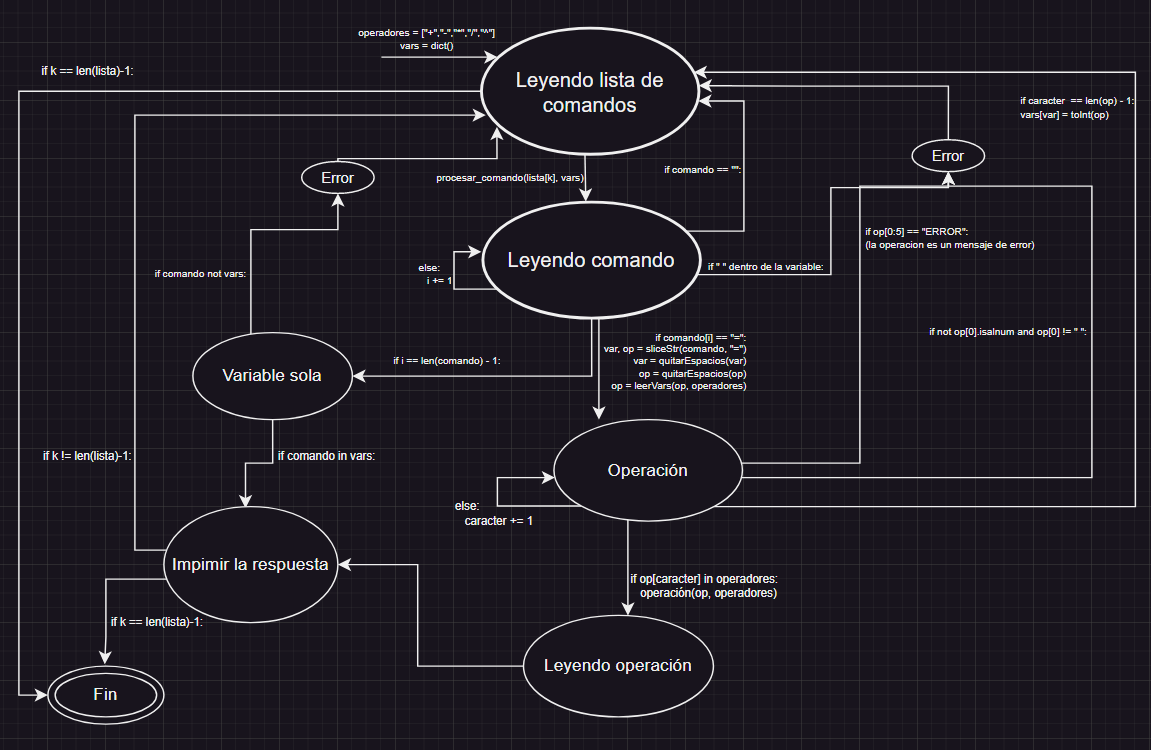

Donde se puede indentificar el uso de múltiples funciones auxiliares, las cuales siguen el funcionamiento general de la calculadora y cuyo funcionamiento se muestra en los siguientes diagramas de estado

Función auxiliar: toInt(num) \\
Función que recibe un numero como string, y lo transforma en un número de tipo int, esto lo hace procesando el número caracter a caracter.

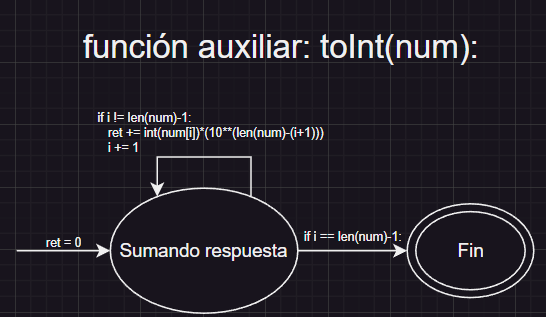

Función auxiliar: sliceStr(string,char) \\
Funcion que recibe un string y un caracter, retornando dos variables, la primera parte del string hasta antes del carácter recibido y la segunda parte del string que viene después del carácter.

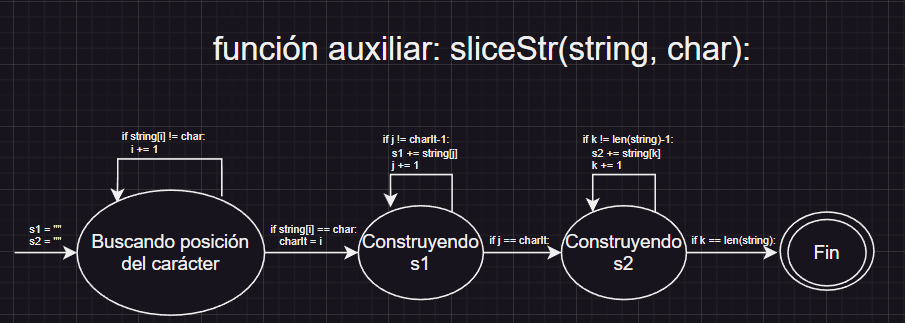

Función auxiliar: operate(num1, op, num2) \\
Función que recibe dos numeros y los opera según el operador que reciba la función en forma de carácter.

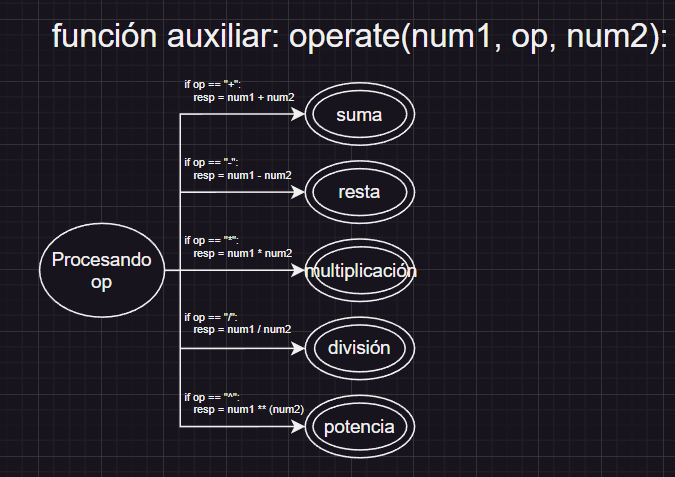

Función auxiliar: quitarEspacios(string) \\
Funcion que recibe el string de un comando válido para calculadora y le quita los espacios, para operarlo caracter por caracter con facilidad. Este proceso también lo realiza carácter por carácter.

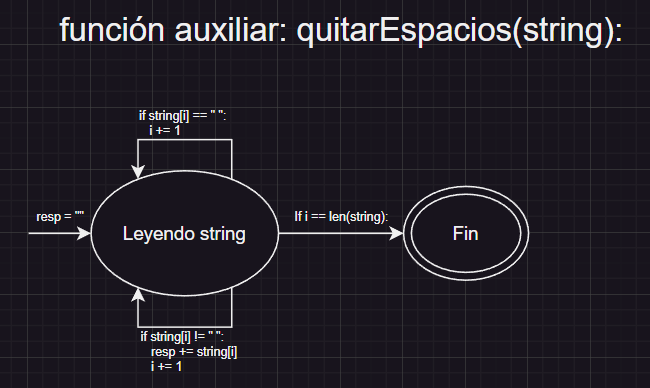

Función auxiliar: leerVars(string, dicc, operadores) \\
Función que recibe un string y lo reescribe caracter por caracter, traduciendo las variables que hayan sido definidas con anterioridad, si se encuentra una variable que no haya sido definida se retorna un error.

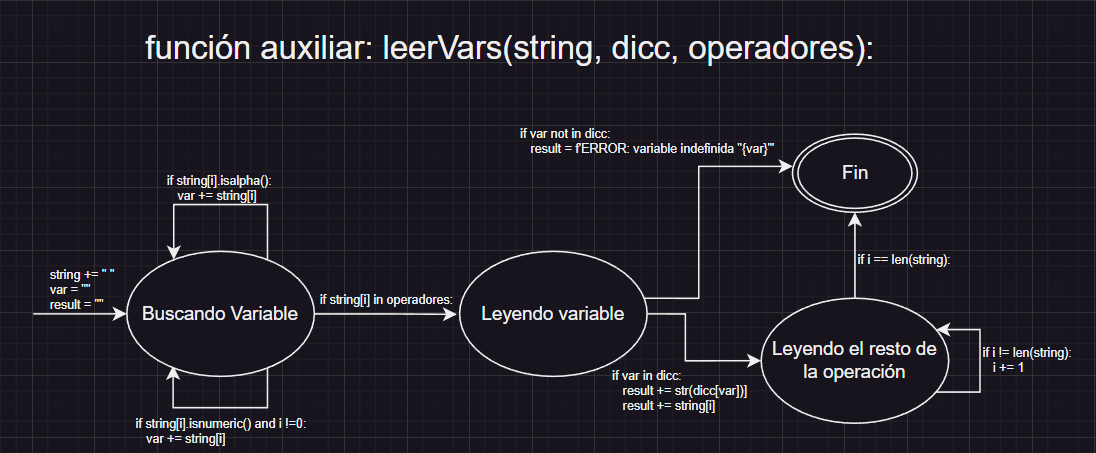

Función auxiliar: operacion(string) \\
Funcion que recibe un comando en forma de string y lo opera caracter a caracter de izquierda a derecha.

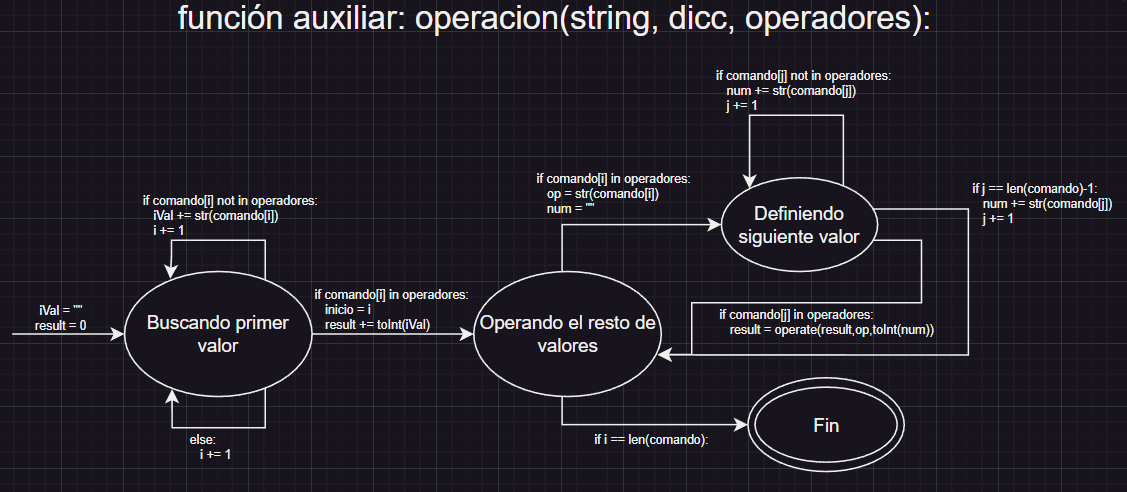

## Implementación en código:

In [ ]:
#funcion que recibe un string de un entero y lo devuelve como un entero, procesandolo caracter por caracter
def toInt(num):
  ret = 0
  for i in range(0, len(num)):
    ret += int(num[i])*(10**(len(num)-(i+1)))
  return ret

#funcion que procesa un string caracter por caracter, devolviendo dos variables con los strings antes y despues del caracter
def sliceStr(string, char):
  s1 = ""
  s2 = ""
  for i in range(0, len(string)):
    if string[i] == char:
      charIt = i
      break #encuentra el char y deja de buscarlo
  for j in range(0, charIt):
    s1 += string[j]
  for k in range(charIt+1, len(string)):
    s2 += string[k]

  return s1, s2

#función que procesa una operación de tres numeros, recibe un numero, un operador y otro numero
def operate(num1, op, num2):
  if op == "+":
    resp = num1 + num2
  elif op == "-":
    resp =  num1 - num2
  elif op == "*":
    resp = num1 * num2
  elif op == "/":
    resp = num1 / num2
  elif op == "^":
    resp = num1 ** (num2)
  return resp



# esta funcion recibe la operacion que se está procesando actualmente y la procesa de manera que
# las operaciones se realizan de izquierda a derecha

def operacion(comando,operadores):
  iVal = "" #string para indentificar el primer valor
  result = 0 #variable para ir sumando la respuesta
  for i in range(0, len(comando)):
    if comando[i] not in operadores: #si el caracter no es un operador se busca el primer numero para operar
      iVal += str(comando[i])
    elif comando[i] in operadores:
        inicio = i
        result += toInt(iVal)
        break
  for i in range(inicio, len(comando)): #se operan los numeros restantes
    if comando[i] in operadores:
      op = str(comando[i])
      num = ""
      for j in range(i+1, len(comando)):
        if j == len(comando)-1:
          num += str(comando[j])
          result = operate(result,op,toInt(num)) #evaluacion
          break
        elif comando[j] not in operadores:
          num += str(comando[j])
        elif comando[j] in operadores:
          result = operate(result,op,toInt(num)) #evaluacion
          break
  return result

#función que recibe un string de un comando válido y retorna el string sin los caracteres " "
def quitarEspacios(string):
  resp = ""
  for i in range(0, len(string)):
    if string[i] != " ":
      resp += str(string[i])
  return resp


# esta funcion recibe el comando que se está procesando y la lista de variables hasta el momento
# y reemplaza el valor guardado, en caso de que la variable exista, en caso de que no se retorna un
# mensaje de error

def leerVars(string, dicc, operadores):
  buscandoVar = False
  string += " "
  var = ""
  result = "" #string respuesta
  for i in range(0, len(string)):
    if string[i] == " ": #si se identifica el espacio agregado al final se deja de buscar vars
      break
    elif (string[i] in operadores) and (buscandoVar == True):#si se encuentra un operador se entiende que se deja de leer una variable
      buscandoVar = False
      if var in dicc:
        result += str(dicc[var]) #si la variable está definida se agrega al string respuesta
        result += string[i]
      elif var not in dicc:
        result = f'ERROR: variable indefinida "{var}"'#si la variable no está definida la operacion se transforma en un mensaje de error
        break
    elif string[i].isalpha(): #si de identifica una letra se empieza a buscar una var
      var += string[i] #se agrega el caracter
      buscandoVar = True
    elif (string[i].isnumeric()) and (i != 0) and (buscandoVar == True):#si se indentifica un numero antes de un operador se sigue hablando de una variable
      var += str(string[i]) #se agrega el caracter
    else:
      result += string[i] #si el actual caracter no es alphanum, se siguen buscando vars
  return result



# Esta función recibe un comando en string y el diccionario de variables. Con él,
# procesa el comando, imprime el resultado de la expresion
# y posiblemente modifica el diccionario. La función retorna el diccionario

def procesar_comando(comando, dicc_var, operadores):
  # procesa el comando e imprime el resultado
  for i in range(0,len(comando)):#si el comando es vacío, este se ignora
    if comando == "":
      break #se va al siguiente comando de la lista
    else:
      if len(comando) >= 3 and i != len(comando)-1 and comando[i] == " " and ((comando[i+1].isalnum or comando[i-1].isalnum) and comando[i+1] != "="): #se detecta un espacio dentro de la variable
        print(f'ERROR: al procesar "{comando}"')
        break #se va al siguiente comando de la lista
      elif comando[0].isdigit(): #si se detecta un numero antes de "=" es un error de sintaxis
        print(f'ERROR: al procesar "{comando}"')
        break #se va al siguiente comando de la lista
      elif i == len(comando)-1: #si se está en el ultimo carácter (sin haber encontrado "="), se reconoce una variable sola como comando
        if comando not in dicc_var: #si la variable no se ha definido en un anterior comando
          print(f'ERROR: variable indefinida "{comando}"')
          break #se va al siguiente comando de la lista
        elif comando in dicc_var: #si la variable sí se ha definido en un anterior comando
          print(dicc_var[comando])
          break #se va al siguiente comando de la lista
      elif comando[i] in operadores:
        print(f'ERROR: al procesar "{comando}"')
        break #se va al siguiente comando de la lista
      elif comando[i] == "=": #si se encuentra un "=", se reconoce la estructura "variable"+"="+"operación"
        var, op = sliceStr(comando, "=") #se definen las variables
        var = quitarEspacios(var)
        op = quitarEspacios(op)
        op = leerVars(op,dicc_var,operadores) #se leen variables definidas en caso de haberlas
        for caracter in range(0,len(op)):
          if (len(op) >= 6) and (op[0] == "E" and op[1] == "R" and op[2] == "R" and op[3] == "O" and op[4] == "R" and op[5] == ":"): #se detecta un mensaje de error en lugar de una operacion
            print(op) #se printea el mensaje de error
            break #se va al siguiente comando de la lista
          if (not op[0].isalnum()) and (op[0] != " "): #si la operacion no empieza con un numero
            print(f'ERROR: al procesar "{comando}"')
            break #se va al siguiente comando de la lista
          elif caracter == len(op)-1: #variable definida sin operaciones
            dicc_var[var] = toInt(op)
            print(toInt(op))
          elif op[caracter] in operadores: #se detecta un operador
            aux = operacion(op, operadores) #devuelve el numero operado
            dicc_var[var] = int(aux) #devuelve la parte entera del numero operado
            print(dicc_var[var])
            break #se va al siguiente comando de la lista
        break #se va al siguiente comando de la lista
  return dicc_var

def calculadora(lista_comandos):
  # Este diccionario almacena las variables que se vayan definiendo en la calculadora
  # Este diccionario se inicializa cuando se usa la calculadora
  vars = dict()
  operadores = ["+","-","*","/","^"] #lista de operadores admitidos por la calculadora

  # Se procesan todos los comandos de la lista (lista de string)
  for i in range(0, len(lista_comandos)):
    vars = procesar_comando(lista_comandos[i], vars, operadores)



###Ejemplos:

Ejemplo 1:


In [ ]:
# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi * 2","h2 = hanoi /2","","n"]
calculadora(lista)

5
31
82
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

   5

   31

   82

   15

   5



Ejemplo 2:

In [ ]:
# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi2 * 2","h2 = hanoi /2","","n"]
calculadora(lista)

5
31
ERROR: variable indefinida "hanoi2"
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

5

31

ERROR: variable indefinida "hanoi2"

15

5